# やること

# 関数作成
## データセット(X,t)を作る。
## 基底関数$\phi_0,...,\phi_{M-1}$を作る。
e.g. $\phi_0(x)=1, \phi_1(x)=x, \phi_2(x)=x^2,\ldots$
## $\Phi$を計算する
## $w$を計算する

# プロット
1. $(X,t)$ をプロット
2. $(X,Y_{predicted} =w \phi(X))$をプロット

# Cross-Validation

## (X,t)をK分割する。
## それぞれの分割kについて以下をやる。
    ### k番目以外を使って関数を作る。
    ### k番目を使って

3.2乗誤差 $|\omega \phi(x)-t|^2$とRMS(Root mean squre) $\sqrt{ \sum_n |\omega \phi(x_n)-t_n|^2 /N_k}$を計算して評価.

In [32]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# データセット生成

In [46]:
xy_min = -1
xy_max = 1
n_division = 10#100#10

x = np.linspace(xy_min, xy_max, n_division+1)

#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。
X=np.meshgrid(x,x)
t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]+np.sin(X[1])**2 *np.cos(X[0])*X[1]**(5)

num_data=X[0].size
tuple_data_shape=X[0].shape

In [47]:
#ノイズのあるデータの生成

#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布
standard_deviation =0.8; .1 #0.8 #0.1
mean = .0
normal_random_generator = np.random.normal

t_noised=t+ normal_random_generator(mean, standard_deviation,tuple_data_shape)

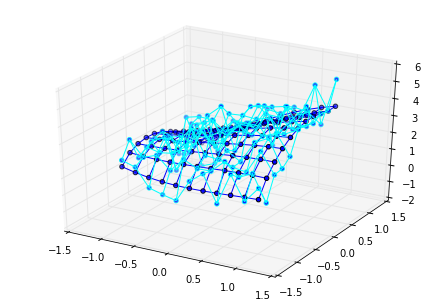

In [48]:
#ノイズの無し／有りデータの表示

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

ax.scatter(X[0],X[1],t_noised,color='cyan') #<---ここでplot
ax.plot_wireframe(X[0],X[1],t_noised,color='cyan') #<---ここでplot

In [49]:
#グリッドデータを点列データとする

x_array=np.reshape(X[0],np.size(X[0]))
y_array=np.reshape(X[1],np.size(X[1]))
t_array=np.reshape(t,np.size(t))
t_noised_array=np.reshape(t_noised,np.size(t))

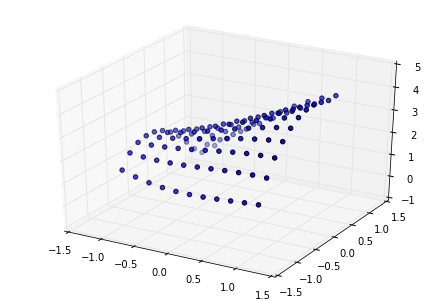

In [50]:
#点列データの表示（上と同様、wireframe は繋がる）

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_array,y_array,t_array) #<---ここでplot

# 基底関数の生成

In [51]:
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
phi_05 =lambda a,b : b**5
phi_sin_x= lambda a,b: np.sin(a)
phi_sin_y= lambda a,b: np.sin(b)
phi_cos_x= lambda a,b: np.cos(a)
phi_cos_y= lambda a,b: np.cos(b)
phi_05_sin_y2_cos_x = lambda a,b:b**5* np.sin(a)**2 *np.cos(b)

phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
num_func=len(phi)

## 基底関数の一般化

def: get_basis_of_polynomials(max_degree)
というような関数を作りたい。

そのために
def: get_polynomials_of_a_degree(degree)
があればよさそう。


get_polynomials_of_a_degree(degree)について考える。

degree=iのとき i+1個の関数ができる。

$\phi(x,y)=x^{k} y^{i-k}$みたいなのがi+1個ある。

k=0,...,iまで動かしていって$\phi(x,y)=x^{k} y^{i-k}$をi+1個つくっていけばいい。

まずは def: make_a_polynomial(k,i) -> $\phi(x,y)=x^{k} y^{i-k}$ みたいな関数をつくればよい。 

In [77]:
def make_a_polynomial(k,i):
#     def phi (x,y):
#         return x**k*y**(i-k);
#     return phi
    return lambda x,y: x**k*y**(i-k)


In [75]:
phi_1_1=make_a_polynomial(1,2)

phi_0_1=make_a_polynomial(0,1)

In [76]:
phi_1_1(10,2)

print phi_0_1(5,5)

5


In [53]:
## Φの生成

PHI = np.zeros((num_data, num_func))

#関数Φ（行：サンプル数,列：基底関数の個数）の各要素に値を入れる
for i,ph in enumerate(phi):
    PHI[:,i] = np.reshape(ph(X[0],X[1]),num_data)

## トレーニング（ノイズなし）

In [54]:
#重みwを求める

PHI_trans=np.transpose(PHI)
w = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_array))
#np.linalg.inv 逆行列を求める 
#ws = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_array))
#solve:方程式の解
print w
#print ws

[  2.98619644e+00   8.86201157e-01   3.16674591e-01   7.99360578e-15
   1.00000000e+00  -1.37893810e+00]


## トレーニング（ノイズあり）

In [55]:
PHI_trans=np.transpose(PHI)
#np.transpose 転置
w_noise = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_noised_array))
#ws_noise = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_noised_array))
print w_noise
#print ws_noise

[ 3.07992522  1.00259641  0.35424715 -0.3645048   1.20665651 -1.29451299]


# 予測

In [56]:
x_sample=(X[0][0,0],X[1][0,0])
y_sample=sum ([ phi[i](*x_sample) for i in xrange(len(phi))])

Y_predicted_array=PHI.dot(w)
Y_predicted=Y_predicted_array.reshape(tuple_data_shape)

Y_predicted_from_noise_array=PHI.dot(w_noise)
Y_predicted_noise=Y_predicted_from_noise_array.reshape(tuple_data_shape)

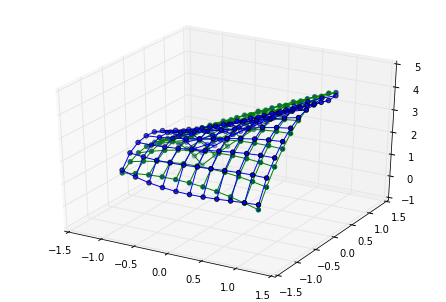

In [57]:
#予測データの表示
#t:ground truth, t_noised:ground truth with noise generated from a normal distribution
#Y_predicted:predicted values by a function trained using t
#Y_predicted_noise:predicted values by a function trained using t_noised

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_wireframe(X[0],X[1],t)
ax.scatter(X[0],X[1],t)

# ax.scatter(X[0],X[1],t_noised,color='cyan')
# ax.plot_wireframe(X[0],X[1],t_noised,color='cyan')

# ax.scatter(X[0],X[1],Y_predicted,color='red')
# ax.plot_wireframe(X[0],X[1],Y_predicted,color='red')

ax.scatter(X[0],X[1],Y_predicted_noise,color='green')
ax.plot_wireframe(X[0],X[1],Y_predicted_noise,color='green')